In [1]:
import pandas as pd
!pip install --upgrade pandas
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.18.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.5 MB/s eta 0:00:00


In [3]:
from google.colab import files

uploaded = files.upload()

Saving HappilyUnmarried.sav to HappilyUnmarried (1).sav


In [4]:
import pyreadstat

# The file name must match the name of the file you've uploaded
df, meta = pyreadstat.read_sav('HappilyUnmarried.sav')


In [5]:
df.to_csv('HappilyUnmarried.csv', index=False)

In [6]:
# Selecting only the relevant columns
df_filtered = df[['ss', 'part10', 'satfs2', 'relationship_length', 'mm_explain']]

In [7]:
import numpy as np

In [8]:
df_filtered = df_filtered.replace('', np.nan)
df_filtered = df_filtered.replace(' ', np.nan)  # If spaces are also considered blank
df_filtered = df_filtered.dropna()

In [9]:
df_filtered

,ss,part10,satfs2,relationship_length,mm_explain
0,2.0,5.0,5.0,36.0,We actually thought it would be best to pool s...
1,3.0,3.0,3.0,109.0,Partner contributes more as she earns more. So...
3,5.0,5.0,4.0,45.0,we wanted to do this in a fair way allowing us...
4,6.0,5.0,5.0,69.0,We wanted to be able to manage our own money s...
5,7.0,4.0,4.0,324.0,Through time and discussion
...,...,...,...,...,...
230,264.0,5.0,4.0,240.0,an agreed temporary arrangement that has not ...
231,265.0,5.0,4.0,48.0,We have different interests so choose to spend...
232,266.0,1.0,5.0,96.0,It grew up based upon equity the person with g...
233,267.0,5.0,3.0,60.0,We have arranged a deed of trust for our new h...


In [10]:
df_filtered = df_filtered.rename(columns={'mm_explain': 'text'})

In [11]:
response = df_filtered.to_dict('records')
print(response[0])

{'ss': 2.0, 'part10': 5.0, 'satfs2': 5.0, 'relationship_length': 36.0, 'text': "We actually thought it would be best to pool some of our income  in a joint account for household expenses but still haven\\'t done it.. So in the meantime we keep each one\\'s accounts and split the costs."}


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# Parse text and classes
texts = [row['text'] for row in response]
satisfaction = [row['part10'] for row in response]

# Vectorize. Let's use TF-IDF weighting:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(texts)

# And get the label (or class) data in a format sklearn likes:
y = np.array(satisfaction)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.30, random_state=1234)

1 vs rest




In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
# Initialize the classifer
clf = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='ovr')

# Fit the training data
clf_fit = clf.fit(X_train, y_train)

# Predict the new classes
y_predict_1vrest = clf_fit.predict(X_test)

print('Here are the first 10 predictions:')
print(y_predict_1vrest[0:10])

Here are the first 10 predictions:
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [68]:
from sklearn.multiclass import OneVsRestClassifier

# Initialize 1 v rest classifer using a
# linear SVC
clf=OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))

# Fit the training data
clf_fit = clf.fit(X_train, y_train)

# Predict the new classes
y_predict_1vrest = clf_fit.predict(X_test)

print('Here are the first 10 predictions:')
print(y_predict_1vrest[0:10])

Here are the first 10 predictions:
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


1v1

In [58]:
from sklearn.multiclass import OneVsOneClassifier

# Initialize 1 v rest classifer using a
# linear SVC
clf=OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=500))

# Fit the training data
clf_fit = clf.fit(X_train, y_train)

# Predict the new classes
y_predict_1v1 = clf_fit.predict(X_test)

print('Here are the first 10 predictions:')
print(y_predict_1v1[0:10])

Here are the first 10 predictions:
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


Performance

In [42]:
from sklearn.metrics import f1_score

In [59]:
print("OneVRest: F1 score for each class = ")
print(f1_score(y_test, y_predict_1vrest, average = None))

print("\nOneVOne: F1 score for each class = ")
print(f1_score(y_test, y_predict_1v1, average = None))

OneVRest: F1 score for each class = 
[0.         0.         0.         0.         0.71153846]

OneVOne: F1 score for each class = 
[0.         0.         0.         0.         0.71153846]


In [60]:
print("OneVOne: macro-averaged F1 score for each class = ")
print(f1_score(y_test, y_predict_1v1, average = 'macro'))

print("\nOneVOne: micro-averaged F1 score for each class = ")
print(f1_score(y_test, y_predict_1v1, average = 'micro'))

OneVOne: macro-averaged F1 score for each class = 
0.1423076923076923

OneVOne: micro-averaged F1 score for each class = 
0.5522388059701493


In [61]:
print("OneVRest: macro-averaged F1 score for each class = ")
print(f1_score(y_test, y_predict_1vrest, average = 'macro'))

print("\nOneVRest: micro-averaged F1 score for each class = ")
print(f1_score(y_test, y_predict_1vrest, average = 'micro'))

OneVRest: macro-averaged F1 score for each class = 
0.1423076923076923

OneVRest: micro-averaged F1 score for each class = 
0.5522388059701493


In [ ]:
df_filtered.part10.value_counts()

5.0    124
4.0     50
3.0     21
1.0     14
2.0     13
Name: part10, dtype: int64

In [69]:
# Force a more balanced class weighting
clf=LogisticRegression(solver='lbfgs', max_iter=500, multi_class='ovr', class_weight='balanced')

# Fit the training data
clf_fit = clf.fit(X_train, y_train)

# Predict the new classes
y_predict_1vrest = clf_fit.predict(X_test)

print("Per-class F1 score = ")
print(f1_score(y_test, y_predict_1vrest, average = None))

print("\nOneVRest: macro-averaged F1 score for each class = ")
print(f1_score(y_test, y_predict_1vrest, average = 'macro'))

print("\nOneVRest: micro-averaged F1 score for each class = ")
print(f1_score(y_test, y_predict_1vrest, average = 'micro'))

Per-class F1 score = 
[0.         0.         0.         0.28571429 0.66666667]

OneVRest: macro-averaged F1 score for each class = 
0.19047619047619047

OneVRest: micro-averaged F1 score for each class = 
0.47761194029850745


hyperparam tuning

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
# Define the parameter grid
param_grid = {
    'estimator__C': [0.1, 1, 10],  # Example values
    'estimator__penalty': ['l1', 'l2']  # Example values
}

# Initialize the OneVsRest Classifier
clf = OneVsRestClassifier(LogisticRegression(solver='liblinear', max_iter=500))

# Initialize Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Use these parameters to make predictions or further analysis
y_predict = grid_search.predict(X_test)

Best Parameters:  {'estimator__C': 0.1, 'estimator__penalty': 'l1'}


In [49]:
final_clf = OneVsRestClassifier(LogisticRegression(solver='liblinear', C=0.1, penalty='l1', max_iter=500))
final_clf.fit(X_train, y_train)
y_predict_final = final_clf.predict(X_test)

In [50]:
# Predict on the test data
y_pred = final_clf.predict(X_test)

# Calculate macro-averaged F1 score
f1_macro = f1_score(y_test, y_pred, average='macro')
print("Macro-averaged F1 score: ", f1_macro)

# Calculate micro-averaged F1 score
f1_micro = f1_score(y_test, y_pred, average='micro')
print("Micro-averaged F1 score: ", f1_micro)

Macro-averaged F1 score:  0.12083333333333332
Micro-averaged F1 score:  0.43283582089552236


Confusion matrix

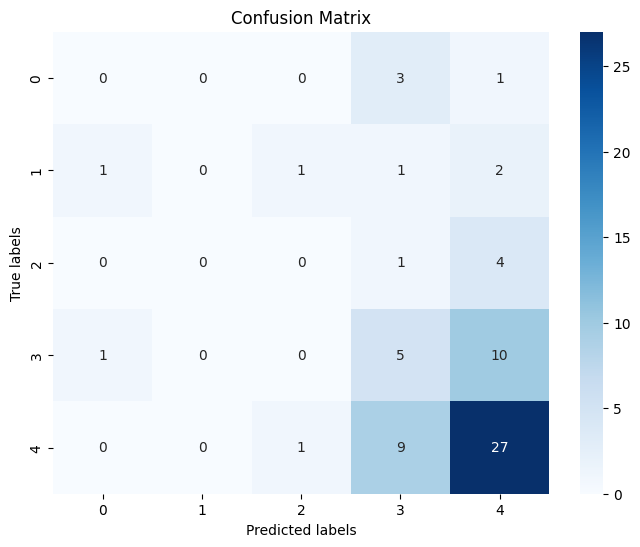

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict_1vrest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

One vs rest

In [71]:
y_scores = clf_fit.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


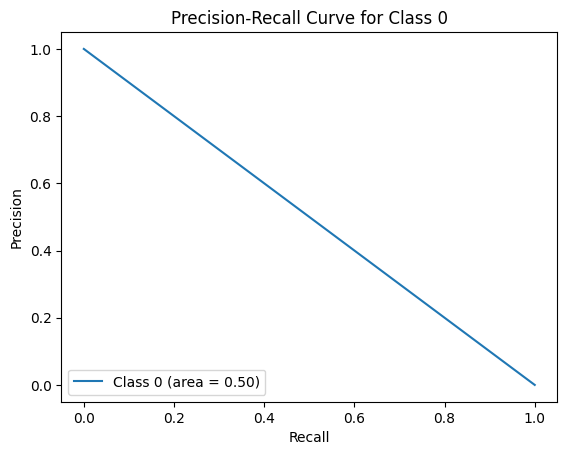

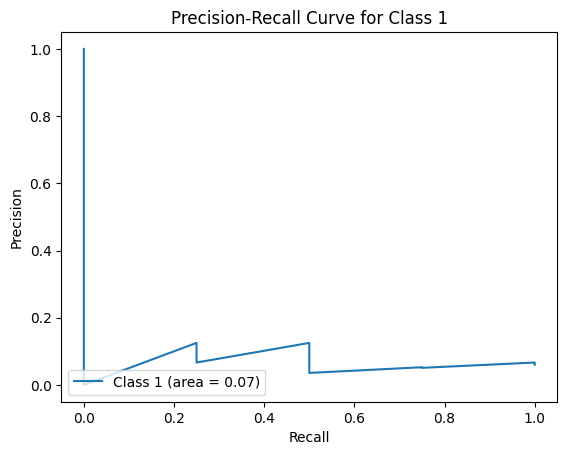

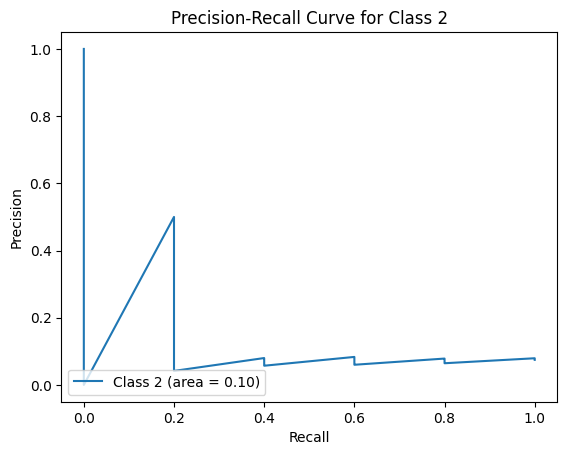

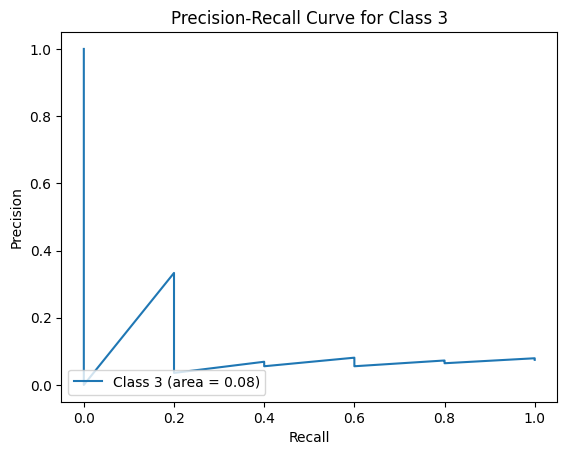

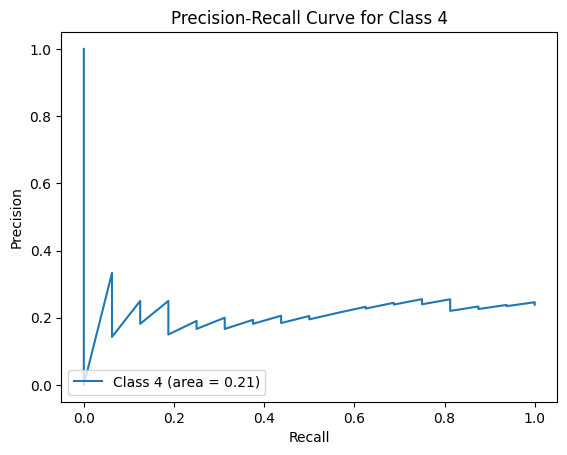

In [72]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

n_classes = y_scores.shape[1]  # Number of classes

for i in range(n_classes):
    # Compute Precision-Recall and plot curve
    precision, recall, _ = precision_recall_curve(y_test == i, y_scores[:, i])
    auc_score = auc(recall, precision)

    plt.figure()
    plt.plot(recall, precision, label='Class %d (area = %0.2f)' % (i, auc_score))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Class %d' % i)
    plt.legend(loc="lower left")
    plt.show()

Analysing unseen data

In [ ]:
import pickle

# Assume clf_fit is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(clf_fit, file)